<a href="https://colab.research.google.com/github/nicoyogis/TUBES-ML/blob/main/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
base_dir = '/content/drive/MyDrive/projek/dataset_split'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'val')

train_cercospora_dir = os.path.join(train_dir, 'cercospora')
train_commonrust_dir = os.path.join(train_dir, 'commonrust')
train_normal_dir = os.path.join(train_dir, 'normal')
train_northernleaf_dir = os.path.join(train_dir, 'northernleafblight')

validation_cercospora_dir = os.path.join(validation_dir, 'cercospora')
validation_commonrust_dir = os.path.join(validation_dir, 'commonrust')
validation_normal_dir = os.path.join(validation_dir, 'normal')
validation_northernleaf_dir = os.path.join(validation_dir, 'northernleafblight')

In [3]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [4]:
# Gather data validation
val_data = []
val_label = []
for r, d, f in os.walk(validation_dir):
    for file in f:
        if ".jpg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            val_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            val_label.append(label)

val_data = np.array(val_data)
val_label = np.array(val_label)

<h3>Data Preprocessing</h3>

In [5]:
# Tampilkan shape dari data train dan data validation
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Validation Data = ", val_data.shape)
print("Validation Label = ", val_label.shape)

Train Data =  (3080, 150, 150, 3)
Train Label =  (3080,)
Validation Data =  (730, 150, 150, 3)
Validation Label =  (730,)


In [6]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_val = val_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [28 73 64]
Data setelah di-normalisasi  [0.10980392 0.28627452 0.2509804 ]


In [7]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_val = lb.fit_transform(val_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['commonrust' 'commonrust' 'commonrust' 'commonrust' 'commonrust'
 'commonrust' 'commonrust' 'commonrust' 'commonrust' 'commonrust']
Label setelah di-encoder  [1 1 1 1 1 1 1 1 1 1]


<h3>Definisikan Model</h3>

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, Conv2D, MaxPool2D, Flatten

In [9]:
# Feature Extraction Layer
model = Sequential()

model.add(InputLayer(input_shape=[150,150,3]))
model.add(Conv2D(filters=16, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=32, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Conv2D(filters=64, kernel_size=3, strides=2, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=2, padding='same'))
model.add(Flatten())

In [10]:
# Fully Connected Layer
model.add(Dense(128, activation='relu'))
model.add(Dense(len(lb.classes_), activation="softmax"))

In [11]:
# Print model summary
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 75, 75, 16)        448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 38, 38, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 19, 19, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)         0

In [12]:
from tensorflow.keras.optimizers import Adam
model.compile(loss='sparse_categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

<h3>Training Model</h3>

In [13]:
H = model.fit(x_train, y_train, batch_size=20, epochs=15, validation_data=(x_val, y_val))

Epoch 1/15
154/154 [==============================] - 32s 14ms/step - loss: 0.5678 - accuracy: 0.7448 - val_loss: 0.3601 - val_accuracy: 0.8301
Epoch 2/15
154/154 [==============================] - 2s 12ms/step - loss: 0.2952 - accuracy: 0.8604 - val_loss: 0.2517 - val_accuracy: 0.8781
Epoch 3/15
154/154 [==============================] - 2s 11ms/step - loss: 0.2540 - accuracy: 0.8883 - val_loss: 0.2466 - val_accuracy: 0.8877
Epoch 4/15
154/154 [==============================] - 2s 12ms/step - loss: 0.2506 - accuracy: 0.8880 - val_loss: 0.1958 - val_accuracy: 0.9178
Epoch 5/15
154/154 [==============================] - 2s 12ms/step - loss: 0.2044 - accuracy: 0.9065 - val_loss: 0.1832 - val_accuracy: 0.9274
Epoch 6/15
154/154 [==============================] - 2s 11ms/step - loss: 0.1681 - accuracy: 0.9250 - val_loss: 0.1922 - val_accuracy: 0.9219
Epoch 7/15
154/154 [==============================] - 2s 11ms/step - loss: 0.1534 - accuracy: 0.9328 - val_loss: 0.1550 - val_accuracy: 0.932

<h3>Evaluasi Model</h3>

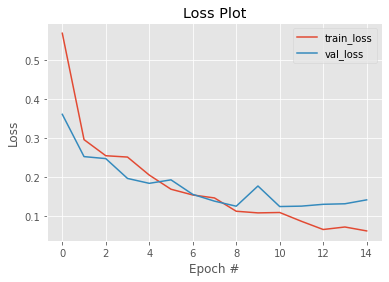

In [14]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, 15), H.history["val_loss"], label="val_loss")
plt.title("Loss Plot")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.legend()
plt.show()

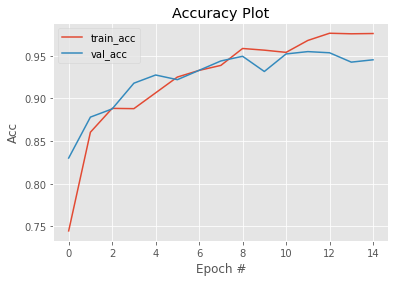

In [17]:
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, 15), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, 15), H.history["val_accuracy"], label="val_acc")
plt.title("Accuracy Plot")
plt.xlabel("Epoch #")
plt.ylabel("Acc")
plt.legend()
plt.show()

In [22]:
#Evaluasi menggunakan classification report
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
from keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix
from google.colab import files

ypred = model.predict(x_val)
prediction = np.argmax(ypred, axis=1)
print(classification_report(y_val, prediction))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80        97
           1       1.00      1.00      1.00       226
           2       1.00      1.00      1.00       220
           3       0.92      0.87      0.89       187

    accuracy                           0.95       730
   macro avg       0.92      0.93      0.92       730
weighted avg       0.95      0.95      0.95       730

